In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import pandas as pd
import numpy as np

import folium
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/covid19-in-italy/covid19_italy_region.csv
/kaggle/input/covid19-in-italy/covid19_italy_province.csv


In [2]:
pr_data=pd.read_csv("../input/covid19-in-italy/covid19_italy_province.csv")
re_data=pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")

re_data.Date=pd.to_datetime(re_data.Date)

## Region Wise Analysis

In [3]:
regions=pr_data.RegionName.unique()
re_pos_case=[]
re_lat=[]
re_long=[]
for region in regions:
    re_pos_case.append(re_data.NewPositiveCases[re_data.RegionName==region].sum())
    re_lat.append(re_data.Latitude[re_data.RegionName==region].mean())
    re_long.append(re_data.Longitude[re_data.RegionName==region].mean())
    
df_reg_total=pd.DataFrame(regions,columns=["Region"])
df_reg_total["Latitude"]=re_lat
df_reg_total["Longitude"]=re_long
df_reg_total["TotalPositiveCases"]=re_pos_case
df_reg_total=df_reg_total.sort_values(by=['TotalPositiveCases'], ascending=False)
df_reg_total.reset_index(inplace=True)

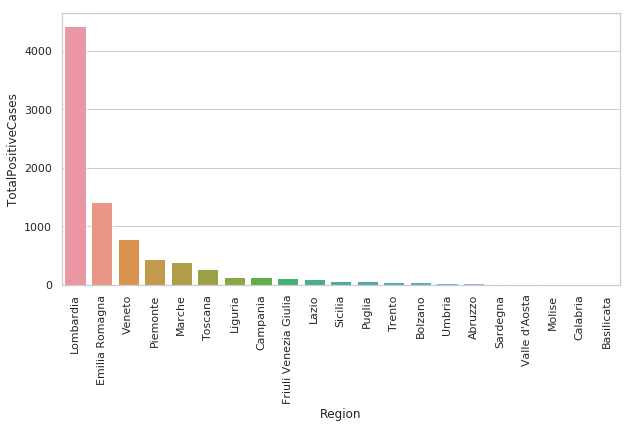

In [4]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
#plt.bar(df_reg_total.Region,df_reg_total.TotalPositiveCases)
plt.xticks(rotation=90)

sns.barplot(df_reg_total.Region,df_reg_total.TotalPositiveCases)
plt.show()

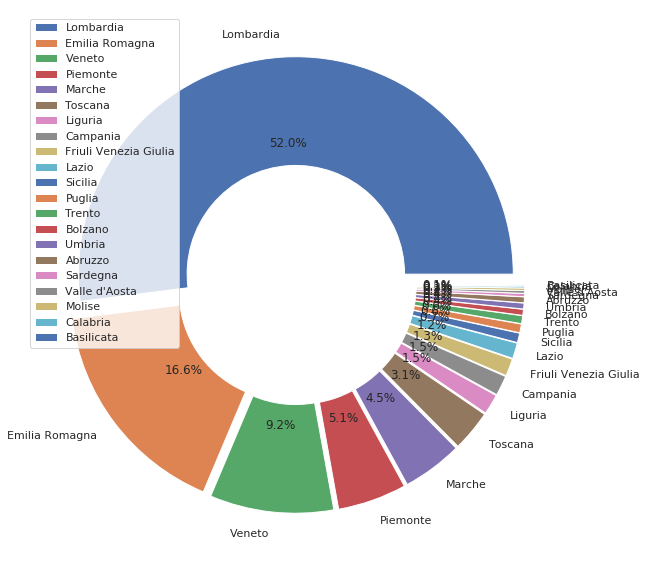

In [5]:
plt.figure(figsize=(10,10))
explode=np.zeros(df_reg_total.shape[0])
explode=explode+0.05
plt.pie(df_reg_total.TotalPositiveCases, labels=df_reg_total.Region, autopct='%1.1f%%', 
        startangle=0,wedgeprops = {'width':0.5}, explode=explode)
plt.legend()
plt.show()

In [6]:
#Region wise mapping
lat=(df_reg_total.Latitude.max()+df_reg_total.Latitude.min())/2
long=df_reg_total.Longitude.mean()

ita_map = folium.Map(location=[lat,long], zoom_start=6,tiles='CartoDB positron')

for i in range(df_reg_total.shape[0]):
    folium.CircleMarker([df_reg_total.Latitude[i], df_reg_total.Longitude[i]], 
                        radius=5+30*df_reg_total.TotalPositiveCases[i]/df_reg_total.TotalPositiveCases.max(),
                        color=None,
                        fill_color='red',fill_opacity=0.4,
                        tooltip=f"Region : {df_reg_total.Region[i]}<br>Confirmed Cases : {df_reg_total.TotalPositiveCases[i]}"
                       ).add_to(ita_map)

ita_map

## Region Time Series

In [7]:
def stats_maker(region="All"):
    if region=="All":
        df=re_data
    else:
        df=re_data[re_data.RegionName==region]
        
    Date=re_data.Date.unique()

    CurrentPositiveCases=[]
    NewPositiveCases=[]
    Recovered=[]
    Deaths=[]
    TotalPositiveCases=[]
    MortalityRate=[]

    for date in Date:
        CurrentPositiveCases.append(df.CurrentPositiveCases[df.Date==date].sum())
        NewPositiveCases.append(df.NewPositiveCases[df.Date==date].sum())
        Recovered.append(df.Recovered[df.Date==date].sum())
        Deaths.append(df.Deaths[df.Date==date].sum())
        TotalPositiveCases.append(df.TotalPositiveCases[df.Date==date].sum())
        MortalityRate.append(df.Deaths[df.Date==date].sum()*100/df.TotalPositiveCases[df.Date==date].sum())

    dict={"Date":Date, "CurrentPositiveCases":CurrentPositiveCases, "NewPositiveCases":NewPositiveCases, 
          "Recovered":Recovered, "Deaths":Deaths,"TotalPositiveCases":TotalPositiveCases, "MortalityRate":MortalityRate}
    ts_total=pd.DataFrame(dict)
    return(ts_total)

In [8]:
def stats_plotter(*regions):

    plt.figure(figsize=(10,6))
    for region in regions:
        ts_total=stats_maker(region)
        sns.lineplot(x='Date', y='TotalPositiveCases',data=ts_total, label="TotalPositiveCases "+str(region))
        sns.lineplot(x='Date', y='Deaths',data=ts_total, label="Deaths"+str(region))
        #sns.lineplot(x='Date', y='Recovered',data=ts_total, label="Recovered"+str(region))
        #sns.lineplot(x='Date', y='NewPositiveCases',data=ts_total, label="NewPositiveCases"+str(region))
        plt.xticks(rotation=90)
        plt.legend()

    plt.show()

    plt.figure(figsize=(10,4))
    
    for region in regions:
        ts_total=stats_maker(region)
        sns.lineplot(x='Date', y='MortalityRate',data=ts_total, label=region)
    plt.show()

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


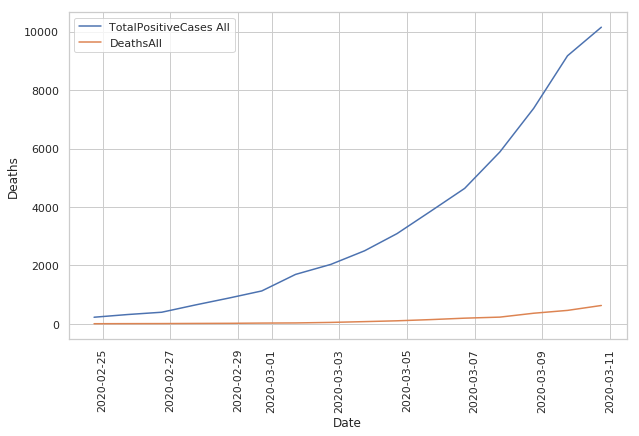

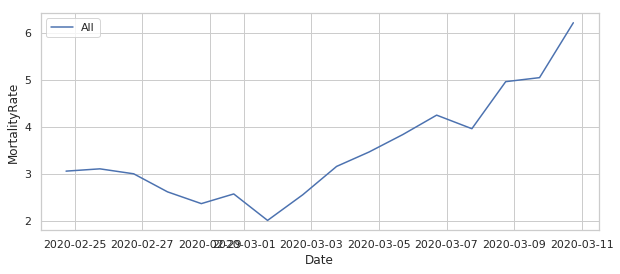

In [9]:
stats_plotter("All")

**Compare Between multiple regions**

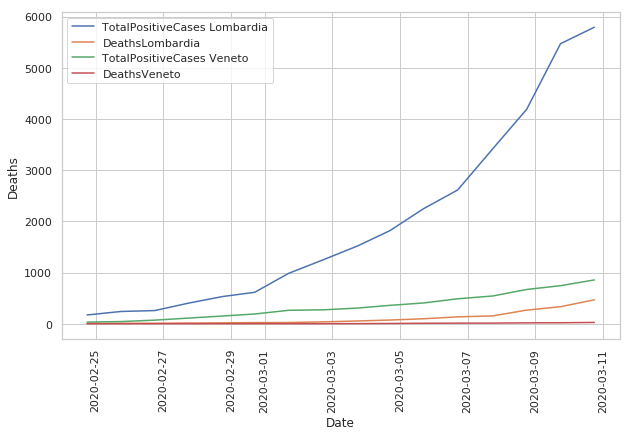

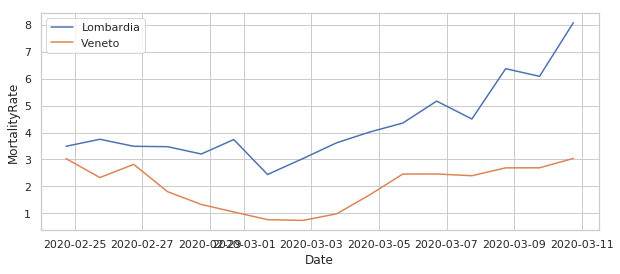

In [10]:
stats_plotter("Lombardia","Veneto")